# Readability Analysis of Job Postings

This notebook analyzes how readable different types of job posts are:
- Real job postings  
- Human-written fake posts  
- AI-refined fake posts  

Understanding readability helps:
- Build trust with clearer language  
- Detect scams using vague/simple text  
- Analyze AI output for unnatural or overly smooth writing

### Readability Metrics Used

- **Flesch Reading Ease**  
  Higher = easier to read  
- **Flesch-Kincaid Grade Level**  
  Grade level needed to understand the text


In [ ]:
import pandas as pd
import textstat
import seaborn as sns
import matplotlib.pyplot as plt


# Load datasets
real_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/real_jobs.csv", keep_default_na=False
)
human_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/fake_jobs.csv", keep_default_na=False
)
ai_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/llm_refined_fake_posts2.csv",
    keep_default_na=False,
)

# Label each dataset
real_jobs["label"] = "real"
human_fake_jobs["label"] = "human_fake"
ai_fake_jobs["label"] = "ai_fake"

# Combine all into one dataframe
data = pd.concat([real_jobs, human_fake_jobs, ai_fake_jobs], ignore_index=True)

In [9]:
# Keep only necessary columns
data = data[["label", "description", "requirements"]]

# Combine description + requirements into one field
data = data[["label", "description", "requirements"]].copy()

# Combine description + requirements into one field
data["combined_text"] = data["description"] + " " + data["requirements"]
data[data["combined_text"] == ""]

,label,description,requirements,combined_text



## Apply Readability Metrics

We'll now use the `textstat` library to calculate:

- Flesch Reading Ease
- Flesch-Kincaid Grade Level


In [ ]:
# Safe scoring functions
def safe_flesch(text):
    try:
        return textstat.flesch_reading_ease(text)
    except Exception:
        return None


def safe_grade(text):
    try:
        return textstat.flesch_kincaid_grade(text)
    except Exception:
        return None


# Apply scores
data["flesch_reading_ease"] = data["combined_text"].apply(safe_flesch)

data["flesch_kincaid_grade"] = data["combined_text"].apply(safe_grade)

## Visualizing the Results

We'll compute average readability scores by job post type.

In [ ]:
# Drop rows with missing values
readability_means = (
    data.dropna(subset=["flesch_reading_ease", "flesch_kincaid_grade"])
    .groupby("label")[["flesch_reading_ease", "flesch_kincaid_grade"]]
    .mean()
    .reset_index()
)

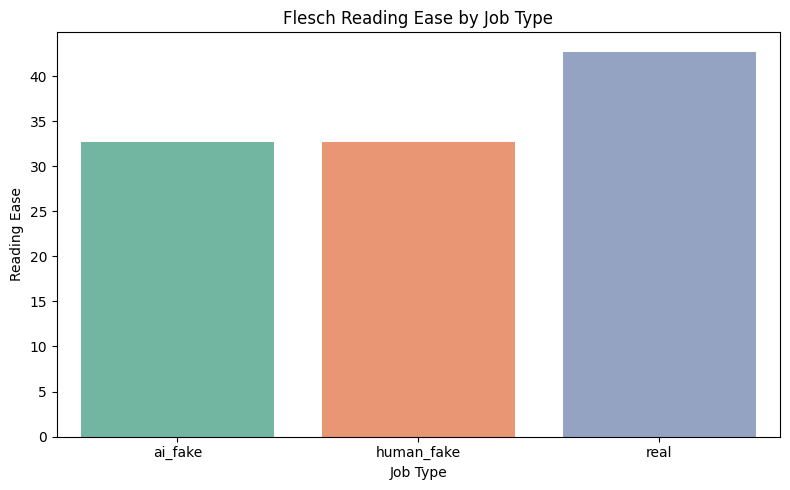

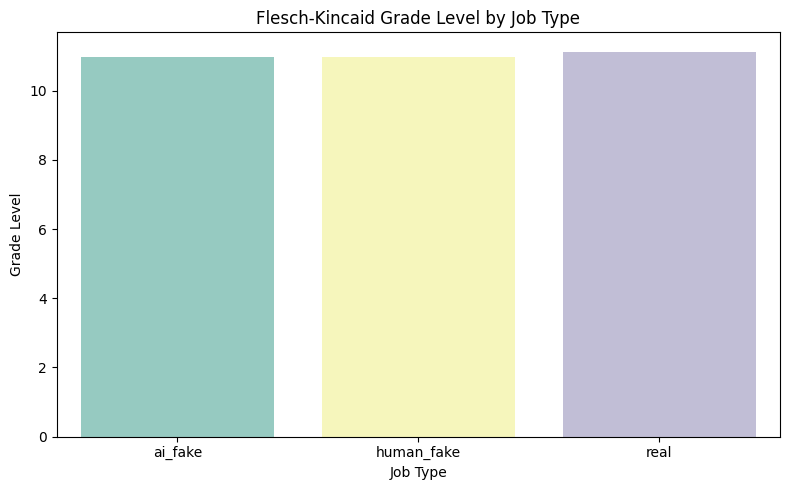

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=readability_means,
    x="label",
    y="flesch_reading_ease",
    hue="label",  # Future-proofing
    palette="Set2",
    legend=False,
)
plt.title("Flesch Reading Ease by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Reading Ease")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=readability_means,
    x="label",
    y="flesch_kincaid_grade",
    hue="label",  # Future-proofing
    palette="Set3",
    legend=False,
)
plt.title("Flesch-Kincaid Grade Levelby Job Type")
plt.xlabel("Job Type")
plt.ylabel("Grade Level")
plt.tight_layout()
plt.show()

---

##  Observations

- **Real posts** are moderately readable — professional yet clear.  
- **Human-written fake posts** are simpler, maybe more emotional.  
- **AI-refined fake posts** are more polished, sometimes harder to read.

This analysis supports identifying scams or synthetic content using readability.

